In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# df = pd.read_csv("D:\Python Study\FDS\Assingment/ass_1_Q_1_data.csv")
df = pd.read_csv("C:\Musfique's Folder\Python\FDS\Assingment/ass_1_Q_1_data.csv")
df

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\PC\AppData\Local\Temp\ipykernel_3748\2031859429.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("C:\Musfique's Folder\Python\FDS\Assingment/ass_1_Q_1_data.csv")


,EmployeeID,Department,Age,Salary
0,1,HR,35,50000
1,2,Engineering,30,60000
2,3,Engineering,32,65000
3,4,HR,40,55000
4,5,Marketing,28,48000
5,6,Marketing,27,47000
6,7,HR,45,53000
7,8,Engineering,29,61000


Write a Python code to calculate the mean Age and mean Salary for each Department
using the given data in Table 1. You should use the pandas library to group the data
by the Department and then calculate the mean values for Age and Salary. What is the
expected output for the mean Age and mean Salary by Department based on your code?

In [5]:
departmentwise_gourp = df.groupby('Department').mean(['Age','Salary'])
departmentwise_gourp

,EmployeeID,Age,Salary
Department,,,
Engineering,4.333333,30.333333,62000.000000
HR,4.000000,40.000000,52666.666667
Marketing,5.500000,27.500000,47500.000000


In [60]:
df.groupby('Department').agg({"Age": ['mean'],
                              "Salary": ['mean']})#.reset_index()

,Age,Salary
,mean,mean
Department,,
Engineering,30.333333,62000.000000
HR,40.000000,52666.666667
Marketing,27.500000,47500.000000


In [7]:
df.groupby('Department').agg(
                            mean_age = ('Age', np.mean), 
                            mean_salary = ('Salary', np.mean)
).reset_index()

C:\Users\PC\AppData\Local\Temp\ipykernel_3748\2674634426.py:1: FutureWarning: The provided callable <function mean at 0x00000264C805B6A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Department').agg(
C:\Users\PC\AppData\Local\Temp\ipykernel_3748\2674634426.py:1: FutureWarning: The provided callable <function mean at 0x00000264C805B6A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Department').agg(


,Department,mean_age,mean_salary
0,Engineering,30.333333,62000.000000
1,HR,40.000000,52666.666667
2,Marketing,27.500000,47500.000000


Modify the existing code to include a custom Python function that, when applied to the
 dataset, finds and returns the top 2 employees with the highest salaries within each depart
ment and also write the output of your code. Ensure that the function is applied separately
 to each department as part of the existing code and dataset provided.

In [62]:
def top_two_salaries(ds, column = "Salary", n= 2):
    sorted_salary = ds.sort_values(by=column)[-n:]
    return sorted_salary

df.groupby('Department').apply(top_two_salaries)


C:\Users\PC\AppData\Local\Temp\ipykernel_3748\1480247087.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Department').apply(top_two_salaries)


EmployeeID   Department  Age  Salary
Department                                         
Engineering 7           8  Engineering   29   61000
            2           3  Engineering   32   65000
HR          6           7           HR   45   53000
            3           4           HR   40   55000
Marketing   5           6    Marketing   27   47000
            4           5    Marketing   28   48000

In [63]:
def top_two_salaries(group):
    return group.nlargest(2, "Salary")

largest_salaries = df.groupby("Department").apply(top_two_salaries)
largest_salaries

C:\Users\PC\AppData\Local\Temp\ipykernel_3748\671468951.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  largest_salaries = df.groupby("Department").apply(top_two_salaries)


EmployeeID   Department  Age  Salary
Department                                         
Engineering 2           3  Engineering   32   65000
            7           8  Engineering   29   61000
HR          3           4           HR   40   55000
            6           7           HR   45   53000
Marketing   4           5    Marketing   28   48000
            5           6    Marketing   27   47000

In [8]:
data= {
 'Age': [25, 30, 35, 40, 45],
 'Income': [50000, 60000, 75000, 90000, 80000],
'Education': [12, 16, 14, 18, 15],
 'Savings': [20000, 25000, 30000, 40000, 35000],
 'Spending': [15000, 18000, 20000, 22000, 21000],
 'Exercise Hours': [3, 2, 4, 1, 3]
 }

df2 = pd.DataFrame(data)
df2

,Age,Income,Education,Savings,Spending,Exercise Hours
0,25,50000,12,20000,15000,3
1,30,60000,16,25000,18000,2
2,35,75000,14,30000,20000,4
3,40,90000,18,40000,22000,1
4,45,80000,15,35000,21000,3


In [9]:
corrilation = df2.corr(numeric_only=True)
corrilation

,Age,Income,Education,Savings,Spending,Exercise Hours
Age,1.000000,0.891133,0.565685,0.900000,0.911685,-0.138675
Income,0.891133,1.000000,0.735147,0.990148,0.981689,-0.315810
Education,0.565685,0.735147,1.000000,0.777817,0.765532,-0.784465
Savings,0.900000,0.990148,0.777817,1.000000,0.968665,-0.416025
Spending,0.911685,0.981689,0.765532,0.968665,1.000000,-0.284463
Exercise Hours,-0.138675,-0.315810,-0.784465,-0.416025,-0.284463,1.000000


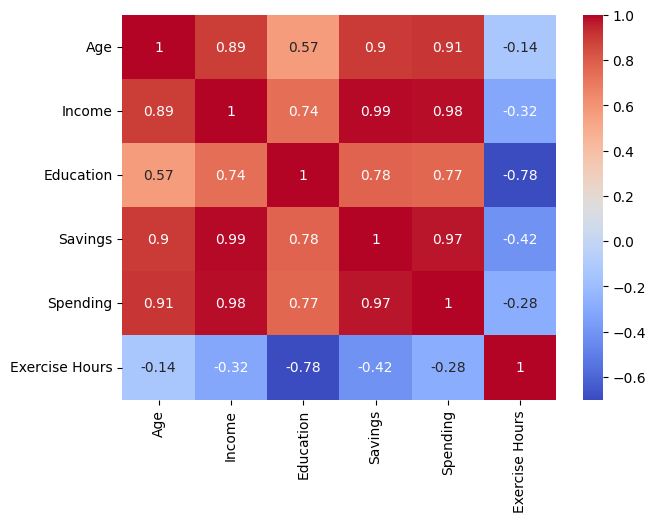

In [32]:

sns.heatmap(corrilation, annot = True, cmap= "coolwarm", vmin=-.7, vmax=1)

plt.rcParams['figure.figsize'] = (6, 5)

plt.show()

# **Suppose, your written code generates the heatmap displayed in Figure 1. Based on the heatmap provided, analyze the correlations between variables and identify the pairs that exhibit strong positive, strong negative, weak, and zero correlations. Justify your analysis with proper reasoning.** 

The heatmap in Figure 1 displays the correlation coefficients between several variables, each ranging between -1 and 1. The color bar indicates the strength of these correlations, with red representing positive correlations, blue representing negative correlations, and the intensity of the color showing the magnitude.

### Definitions for correlation strength:
- **Strong Positive Correlation**: Close to +1 (Red region)
- **Strong Negative Correlation**: Close to -1 (Blue region)
- **Weak Correlation**: Near 0 (White region)
- **Zero Correlation**: Exactly 0 (No relation)

### Analysis of Correlations:

1. **Strong Positive Correlations**:
   - **Income and Savings (0.99)**: The highest positive correlation, indicating that as income increases, savings also increase significantly.
   - **Income and Spending (0.98)**: A strong positive correlation, suggesting that individuals with higher incomes tend to spend more.
   - **Age and Savings (0.90)**: As people age, they save more, showing a strong positive correlation.
   - **Age and Spending (0.91)**: Age also positively correlates with spending.
   - **Income and Age (0.89)**: Indicates that older individuals tend to have higher incomes.
   - **Savings and Spending (0.97)**: A very strong correlation, showing that individuals who save more tend to spend more, which may indicate general wealth accumulation.

2. **Strong Negative Correlations**:
   - **Education and ExerciseHours (-0.78)**: The most negative relationship, suggesting that higher education is associated with fewer hours spent exercising. This could be due to time constraints or lifestyle choices.
   - **Savings and ExerciseHours (-0.42)**: This negative correlation implies that individuals who save more might spend less time exercising, possibly due to differing lifestyle or financial priorities.
   - **Income and ExerciseHours (-0.32)**: Similarly, higher-income individuals appear to exercise less, although the relationship is weaker than that of education and exercise.
   
3. **Weak or Moderate Positive Correlations**:
   - **Age and Education (0.57)**: Older individuals tend to have higher education levels, but the correlation is moderate.
   - **Education and Savings (0.78)**: There is a moderately strong relationship between higher education and more savings, suggesting education may help with financial management.
   - **Education and Spending (0.77)**: A similar strength of correlation shows that higher education leads to more spending, possibly due to higher income levels.

4. **Weak Negative Correlations**:
   - **Age and ExerciseHours (-0.14)**: A weak negative correlation, showing that age has a minimal effect on exercise hours, with older people tending to exercise slightly less.
   - **Spending and ExerciseHours (-0.28)**: A relatively weak negative relationship shows that people who spend more tend to exercise slightly less.

### Summary:
- **Strong Positive Correlations**: Income-Savings, Income-Spending, Age-Savings, Age-Spending.
- **Strong Negative Correlations**: Education-ExerciseHours, Savings-ExerciseHours, Income-ExerciseHours.
- **Moderate Positive Correlations**: Education-Savings, Education-Spending, Age-Education.
- **Weak Negative Correlations**: Age-ExerciseHours, Spending-ExerciseHours.

This analysis shows that financial variables (income, savings, and spending) are closely interlinked, while educational attainment and exercise habits exhibit a more inverse relationship.